# DS3000 Day 5

Jan 30, 2025

Admin

- Lab 1 grades are out. You have until February 2, to put regrade request
- Project Phase I: Proposals due by **February 7**
- Homework 2 due by **February 14**
- Project Guidelines are up


Push-Up Tracker
- Section 04: 2

Content:
- Exploring Data
    - Plotting
    - (Next Time):
      - Cleaning Data (we've already done some of this)
      - Basic Data Summaries

In [1]:
# packages for today
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import requests
from bs4 import BeautifulSoup
import pandas as pd

# Exploring Data with Plots and Basic Data Summaries

After we did all this work to scrape our data, what next? Assuming your data is all clean (a big assumption!), the next step is basic level analysis:
- Graphically describe/summarize the features in your data set
- Numerically describe/summarize the features in your data set

This is an important step! You can't just jump directly into machine learning, since a lot of the choices you make when constructing your machine learning models depends on your understanding of the data. A quick plot:

# How do I explore a new-to-me dataset?

## First: View raw data

- `.shape()`
- `.columns()`
- `.unique()`
- `Counter()`

## Second: Make some plots

- matplotlib
- seaborn
- plotly

## Third: Calculate numerical summaries

In [1]:
import pandas as pd

# we can read zipped csv files too!
# source (https://www.kaggle.com/datasets/alexandrepetit881234/korean-demographics-20002022)
df_korea = pd.read_csv('korea_demo.zip')
df_korea.head()

,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
0,1/1/2000,Busan,3752.0,11.61,1875.0,5.8,814.0,2.5,2435.0,7.5,1877.0,5.8
1,1/1/2000,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7
2,1/1/2000,Chungcheongnam-do,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7
3,1/1/2000,Daegu,3057.0,14.39,1117.0,5.3,422.0,2.0,1577.0,7.4,1940.0,9.1
4,1/1/2000,Daejeon,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2


In [59]:
# 4.86k rows, 12 columns
df_korea.shape

(4860, 12)

In [15]:
# get names of columns
df_korea.columns

Index(['Date', 'Region', 'Birth', 'Birth_rate', 'Death', 'Death_rate',
       'Divorce', 'Divorce_rate', 'Marriage', 'Marriage_rate',
       'Natural_growth', 'Natural_growth_rate'],
      dtype='object')

In [16]:
# what are all the different values which appear in a given column?
df_korea['Region'].unique()

array(['Busan', 'Chungcheongbuk-do', 'Chungcheongnam-do', 'Daegu',
       'Daejeon', 'Gangwon-do', 'Gwangju', 'Gyeonggi-do',
       'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Incheon', 'Jeju',
       'Jeollabuk-do', 'Jeollanam-do', 'Sejong', 'Seoul', 'Ulsan',
       'Whole country'], dtype=object)

In [3]:
# using Counter to count number of entries with each value
# this is the most common way to numerically summarize a categorical variable
from collections import Counter

#Counter(dataframename['Any Given Coloumn'])



## Groupby (we'll do more numerical summaries next time)

We've seen this before! `.groupby` collects all the rows which have some consistent feature in the data and reports aggregate statistics (often the `.mean()` is helpful) for a give column:

In [65]:
# average across all rows with the same Region
df1=df_korea.groupby('Region')
print(df1.Birth.max())
# df_korea.groupby('Region').Birth.max()

Region
Busan                 3935.0
Chungcheongbuk-do     1903.0
Chungcheongnam-do     2398.0
Daegu                 3057.0
Daejeon               1859.0
Gangwon-do            1966.0
Gwangju               2159.0
Gyeonggi-do          13527.0
Gyeongsangbuk-do      3362.0
Gyeongsangnam-do      3972.0
Incheon               3320.0
Jeju                   842.0
Jeollabuk-do          2547.0
Jeollanam-do          2679.0
Sejong                 392.0
Seoul                12866.0
Ulsan                 1524.0
Whole country        61644.0
Name: Birth, dtype: float64


In [6]:
#what was the highest natural growth rate in each region?


If all columns are numeric, you can just apply `.mean()` to the whole thing:

In [9]:
# remove the 'Date' column, since it's not a number (Lets get the mean of Region using groupby)
print(df_korea.head())
# df_korea.iloc[]

       Date             Region   Birth  Birth_rate   Death  Death_rate  \
0  1/1/2000              Busan  3752.0       11.61  1875.0         5.8   
1  1/1/2000  Chungcheongbuk-do  1903.0       15.06   924.0         7.3   
2  1/1/2000  Chungcheongnam-do  2398.0       14.75  1466.0         9.0   
3  1/1/2000              Daegu  3057.0       14.39  1117.0         5.3   
4  1/1/2000            Daejeon  1859.0       16.08   565.0         4.9   

   Divorce  Divorce_rate  Marriage  Marriage_rate  Natural_growth  \
0    814.0           2.5    2435.0            7.5          1877.0   
1    220.0           1.7     828.0            6.6           979.0   
2    321.0           2.0    1055.0            6.5           932.0   
3    422.0           2.0    1577.0            7.4          1940.0   
4    280.0           2.4     868.0            7.5          1294.0   

   Natural_growth_rate  
0                  5.8  
1                  7.7  
2                  5.7  
3                  9.1  
4              

## Plotting

A plot (visualization) is one of data's ways of speaking to us:
 - we plot to help ourselves understand data
     - get in the habit of quickly plotting some "quick and ugly" graphs to get a sense of your data or even songs
![he](https://preview.redd.it/charts-by-marshall-eriksen-v0-i0beswa7acab1.jpg?width=1080&crop=smart&auto=webp&s=66e544467c5a5fbf7ad36cec41c59b3460339638)
 - we plot to help others understand data
     - we build beautiful graphs because a picture can be worth a thousand words ...
         - check out [https://www.reddit.com/r/dataisbeautiful](https://www.reddit.com/r/dataisbeautiful)
         - check out [https://informationisbeautiful.net/](https://informationisbeautiful.net/)
![fav1](https://i.pinimg.com/564x/43/a1/96/43a1967da1be0e9d0c48d556be78e10d.jpg)

## Plotting Tips:
- always save source code which generated your graph (you'll often need to change something later)
- don't make a pie chart (They can get very messy)
![e](https://images.ctfassets.net/99u0kepfatsy/78eqcOrkafT6bGFdXX1GsU/cc2d0272093cbe4d020faf8dcd019a34/Messy-Pie-Chart-1024x712.jpg)
- dense charts, packed with lots of information, are great to explore
    - [dense chart example](https://www.reddit.com/r/dataisbeautiful/comments/xkvnk1/oc_saw_a_post_of_gender_balance_and_average/)
- sparse charts, with little information in them, are great to communicate
    - [sparse chart example](https://www.reddit.com/r/dataisbeautiful/comments/xiy4fc/oc_nights_when_the_temperature_never_dropped/)


## Multiple Modules

There are several plotting modules. We will see examples from three:

- matplotlib
- seaborn
- plotly

# Histograms
We use histograms to investigate how often certain values appear in the data. 
- The x-axis is (almost) always the values which occur
- the y-axis is how often they occur

- [a delicious example](https://i.redd.it/x42zrm4hi4x51.jpg)
    - they have two columns for s ... easier to read but not proper for Data Science
    - Also, not a histogram because letters aren't numbers...


Todo list:

- `plt.hist()` on `Marriage_rate`
- resizing figure
- `density` keyword
- labelling axes
- `bin` argument
- seaborn makes it look nice
- exporting to pdf:

```python
from matplotlib.backends.backend_pdf import PdfPages

# code which plots goes here

f = 'korea_marriage_hist.pdf'
with PdfPages(f) as pdf:
    pdf.savefig(bbox_inches='tight')
    
```

In [13]:
df_korea.head()

,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
0,1/1/2000,Busan,3752.0,11.61,1875.0,5.8,814.0,2.5,2435.0,7.5,1877.0,5.8
1,1/1/2000,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7
2,1/1/2000,Chungcheongnam-do,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7
3,1/1/2000,Daegu,3057.0,14.39,1117.0,5.3,422.0,2.0,1577.0,7.4,1940.0,9.1
4,1/1/2000,Daejeon,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2


In [14]:
# we will want to know what the minimum and maximum Marriage_rate are
df_korea.loc[:,'Marriage_rate'].min()

np.float64(2.4)

In [15]:
df_korea.loc[:,'Marriage_rate'].max()

np.float64(12.4)

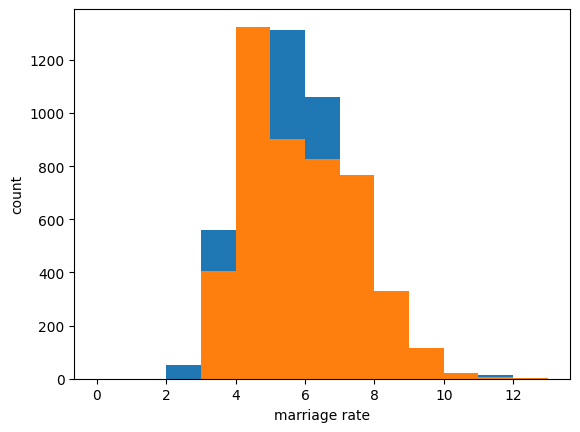

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

# uses seaborn to adjust font size; sometimes not necessary, but 1.2 is a good default
# sns.set(font_scale=1.2)

# set the bins based on the range of the feature of interest
bins = np.linspace(0, 13, 14)

# use matplotlib to make the histogram
plt.hist(df_korea['Marriage_rate'], bins=bins)
plt.hist(df_korea['Death_rate'], bins=bins)
plt.xlabel('marriage rate')
plt.ylabel('count')

#The bins parameter tells you the number of bins that your data will be divided into. You can specify it as an integer or as a list of bin edges.

# the below will save the histogram as a .pdf file in your directory
f = 'korea_marriage_hist.pdf'
with PdfPages(f) as pdf:
    pdf.savefig(bbox_inches='tight')

In [1]:
# change the y-axis to represent the density (so that the sum of all columns is 1)
#only make for Birth 


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


So, while the graph is looking perfect, you may think that it renders really good on your screen. however, that might not be the case. When you add the graph in, let's say, a Word document, you may need to change the size and then it can make the font size of the labels and the ticks smaller. 

However, we do have a fix!

`plt.xlabel('Days', fontsize=38)`

`plt.ylabel('Average Values Per Day',fontsize=38)`

`plt.xticks(fontsize=38)`

`plt.yticks(fontsize=38)`

We can define the sizes of the font! lets see that as an example


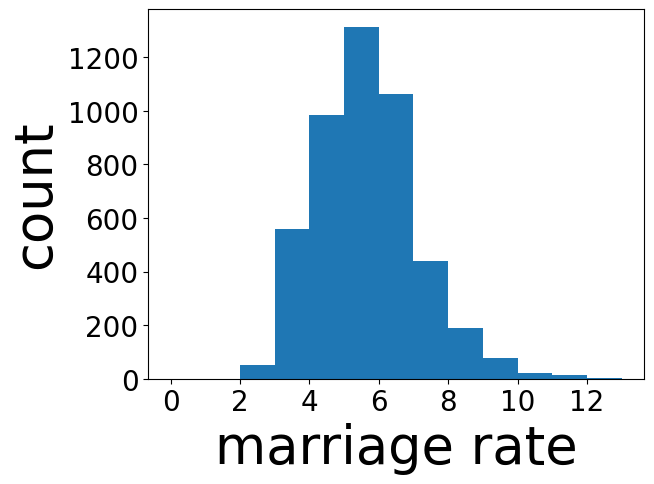

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

# uses seaborn to adjust font size; sometimes not necessary, but 1.2 is a good default
# sns.set(font_scale=1.2)

# set the bins based on the range of the feature of interest
bins = np.linspace(0, 13, 14)

# use matplotlib to make the histogram
plt.hist(df_korea['Marriage_rate'], bins=bins)
plt.xlabel('marriage rate',fontsize=38)
plt.ylabel('count',fontsize=38)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# the below will save the histogram as a .pdf file in your directory
f = 'korea_marriage_hist.pdf'
with PdfPages(f) as pdf:
    pdf.savefig(bbox_inches='tight')

# Subplots
Subplots are useful for showing multiple views of the data side by side.

goal: show relationship between `Marriage_rate` as `Region` varies.

- `plt.subplot(n_rows, n_cols, desired_subplot)`
- figure vs axis (`plt.gcf()` and `plt.gca()`)
- labelling subplot title
- making a bigger figure
    - `plt.figure(figsize=(10, 5))`
        - make a new figure and specify its size
    - `plt.gcf().set_size_inches(15, 7)`
        - get the current figure `gcf()` and set its size
- `plt.ylim()`

0        True
1       False
2       False
3       False
4       False
        ...  
4855    False
4856    False
4857    False
4858    False
4859    False
Name: Region, Length: 4860, dtype: bool


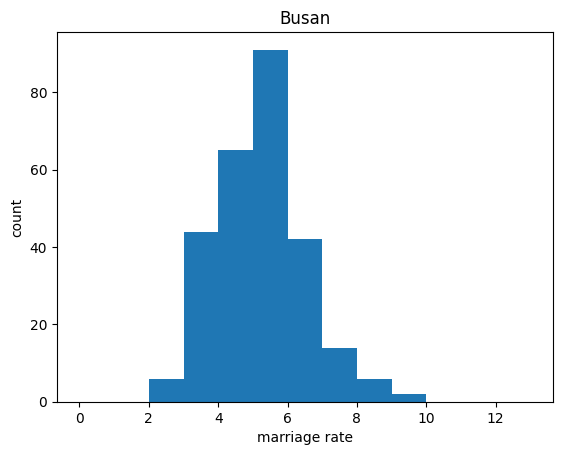

In [13]:
# build one plot, then add loop to make subplot
# let's do Busan
bool_busan = df_korea['Region'] == 'Busan'
print(bool_busan)
df_busan = df_korea.loc[bool_busan, :]

plt.hist(df_busan['Marriage_rate'], bins=bins)
plt.xlabel('marriage rate')
plt.ylabel('count')
plt.gca().title.set_text('Busan') 

In [3]:
# Tell me how to do a plot for Seoul with ticksize as 32









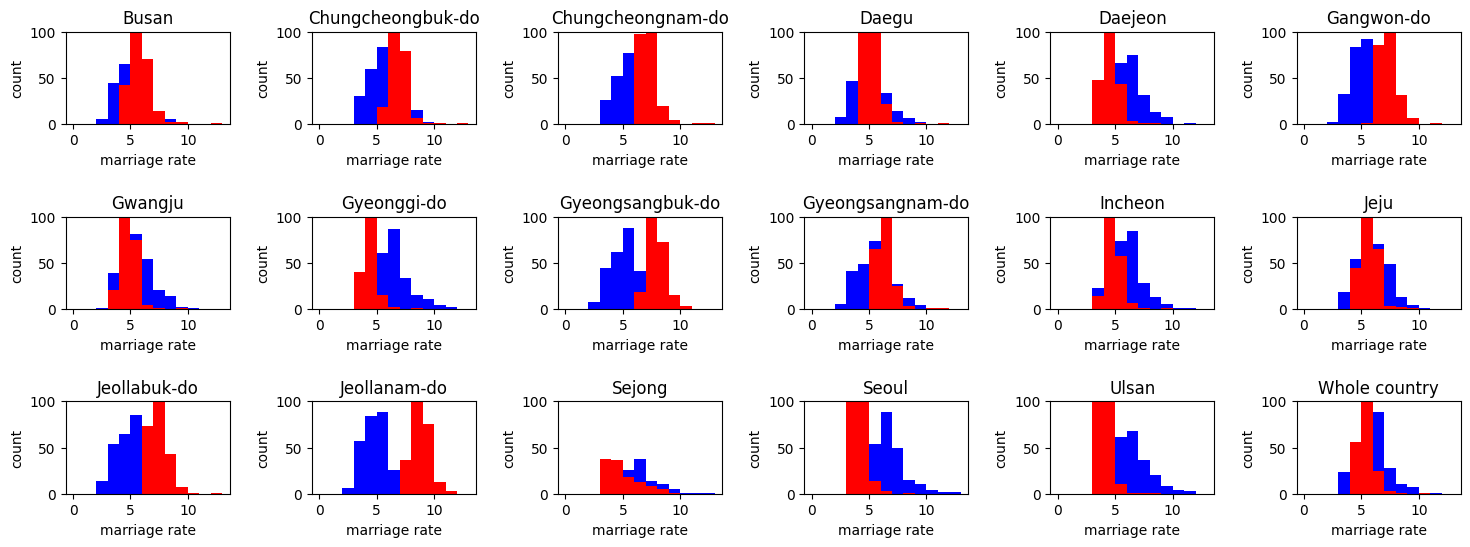

In [13]:
# now all of the regions
# a useful function to convert an array to a list is .tolist()
region_list = df_korea['Region'].unique().tolist()

for region in region_list:
    # activate a specific subplot (use .index() to find the numeric index for the current string)
    region_idx = region_list.index(region)

    # subplot(nrows, ncols, index, **kwargs) <- so nrows is 3, ncols os 6 and index is +1
    plt.subplot(3, 6, region_idx + 1)
    
    # build df_region, only includes rows with the region of interest
    bool_region = df_korea['Region'] == region
    # Here we are g,etting all the rows that are related to the region of interest
    df_region = df_korea.loc[bool_region, :]
    
    # plot histogram
    plt.hist(df_region['Marriage_rate'], bins=bins,color='b')
    plt.hist(df_region['Death_rate'], bins=bins,color='r')
    plt.xlabel('marriage rate')
    plt.ylabel('count')
    # we only want the y-axis label on the first subplot of each row
    if region_idx in (0, 6, 12):
        plt.ylabel('count')
    
    plt.gca().title.set_text(region_list[region_idx]) 
    
    # may need to play around with this to make sure all plots have same/informative y range
    plt.ylim(0, 100)
    
# resizes the whole figure .set_size_inches(width_inches, height_inches) 
plt.gcf().set_size_inches(18, 6)

# (++) adjust spacing between graphs (can play around with this until it looks nice)
plt.subplots_adjust(wspace=.5, hspace=1)

# Lets do one for Birth_rate and Natural growth rate

## Scatter plots

What is the relationship between `Marriage_rate` and `National_growth_rate` in:
1. `Seoul`
1. `Busan`

skills:
- `plt.scatter`
- `alpha`
- multiple scatters on same plot
- legend
- log scale

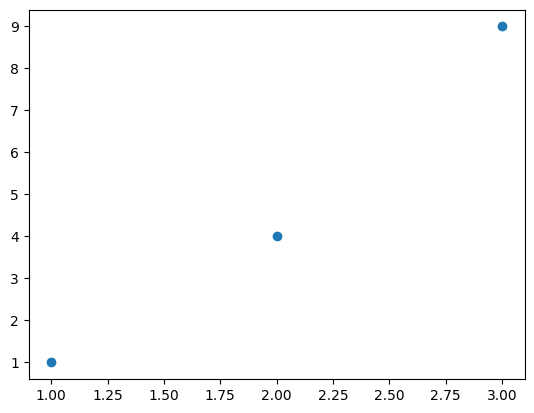

In [11]:
# simple scatter example
x = [1, 2, 3]
y = [1, 4, 9]
plt.scatter(x, y)

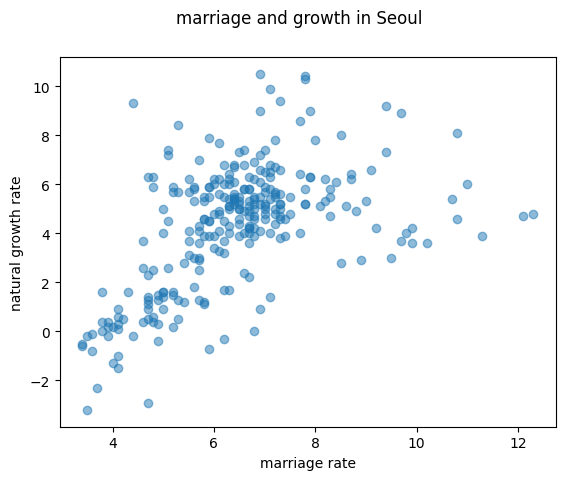

In [12]:
# select only rows corresponding to given region
bool_seoul = df_korea['Region'] == 'Seoul'
df_seoul = df_korea.loc[bool_seoul, :]

# scatter
plt.scatter(df_seoul['Marriage_rate'],
            df_seoul['Natural_growth_rate'], alpha=.5)

# label
plt.xlabel('marriage rate')
plt.ylabel('natural growth rate')
plt.suptitle('marriage and growth in Seoul');

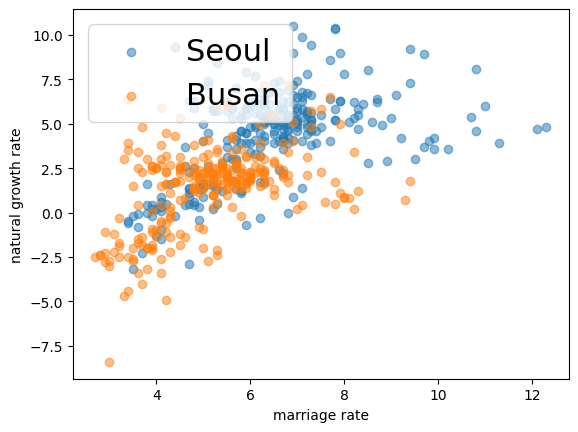

In [88]:
two_regions = ['Seoul', 
               'Busan']

for region in two_regions:
    # boolean index
    bool_region = df_korea['Region'] == region
    df_region = df_korea.loc[bool_region, :]

    # scatter
    plt.scatter(df_region['Marriage_rate'],
                df_region['Natural_growth_rate'], alpha=.5, label=region)
    
# plt.legend()
plt.xlabel('marriage rate')
plt.ylabel('natural growth rate')
# plt.gcf().set_size_inches(10, 8)
# plt.suptitle('comparing relationship of marriage and growth in Seoul and Busan')

# You can always change the position of where the legend would be. It is easy. Lets do it. (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)
plt.legend(loc='upper left',fontsize=22)


# Line Plots

What was the mean `Marriage_rate` over time in the dataset?

- `plt.plot()` (line plot)
- line style (width, color, dot/dash)
- label & legend
- `fill_between()`

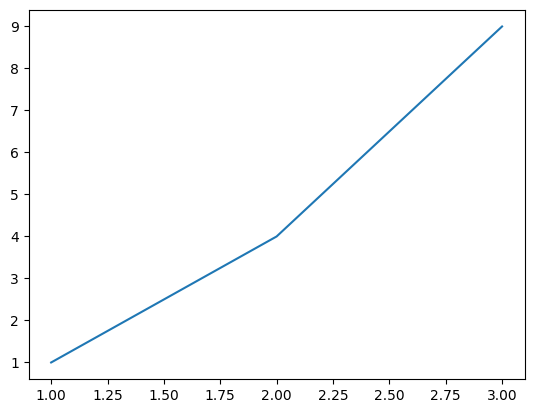

In [19]:
# simple line plot example
x = [1, 2, 3]
y = [1, 4, 9]
plt.plot(x, y)

In [91]:
# can look at the unique dates in the data set
# df_korea['Date'].unique()

# unfortunately, these are strings right now, not dates
# use .to_datetime from pandas to convert a string column to a date (pay attention to format of dates)
df_korea['Date'] = pd.to_datetime(df_korea['Date'], format = '%m/%d/%Y')
df_korea.head()

,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate,Date1
0,2000-01-01,Busan,3752.0,11.61,1875.0,5.8,814.0,2.5,2435.0,7.5,1877.0,5.8,2000-01-01
1,2000-01-01,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7,2000-01-01
2,2000-01-01,Chungcheongnam-do,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7,2000-01-01
3,2000-01-01,Daegu,3057.0,14.39,1117.0,5.3,422.0,2.0,1577.0,7.4,1940.0,9.1,2000-01-01
4,2000-01-01,Daejeon,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2,2000-01-01


In [33]:
print(df_korea['Region'].unique())
# need to remove the Whole country observations (otherwise mean will be skewed)
bool_nocountry = df_korea['Region'] != 'Whole country'
df_korea_new = df_korea.loc[bool_nocountry, :]

# check the values of Region in the new data set to make sure Whole country is gone
df_korea_new['Region'].unique()

['Busan' 'Chungcheongbuk-do' 'Chungcheongnam-do' 'Daegu' 'Daejeon'
 'Gangwon-do' 'Gwangju' 'Gyeonggi-do' 'Gyeongsangbuk-do'
 'Gyeongsangnam-do' 'Incheon' 'Jeju' 'Jeollabuk-do' 'Jeollanam-do'
 'Sejong' 'Seoul' 'Ulsan' 'Whole country']


array(['Busan', 'Chungcheongbuk-do', 'Chungcheongnam-do', 'Daegu',
       'Daejeon', 'Gangwon-do', 'Gwangju', 'Gyeonggi-do',
       'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Incheon', 'Jeju',
       'Jeollabuk-do', 'Jeollanam-do', 'Sejong', 'Seoul', 'Ulsan'],
      dtype=object)

In [37]:
mean_marriage_by_date = df_korea_new.groupby('Date1').Marriage_rate.mean()
mean_marriage_by_date

Date1
2000-01-01    7.306250
2000-02-01    6.956250
2000-03-01    7.437500
2000-04-01    6.912500
2000-05-01    8.356250
                ...   
2022-02-01    3.870588
2022-03-01    3.447059
2022-04-01    3.658824
2022-05-01    3.805882
2022-06-01    3.452941
Name: Marriage_rate, Length: 270, dtype: float64

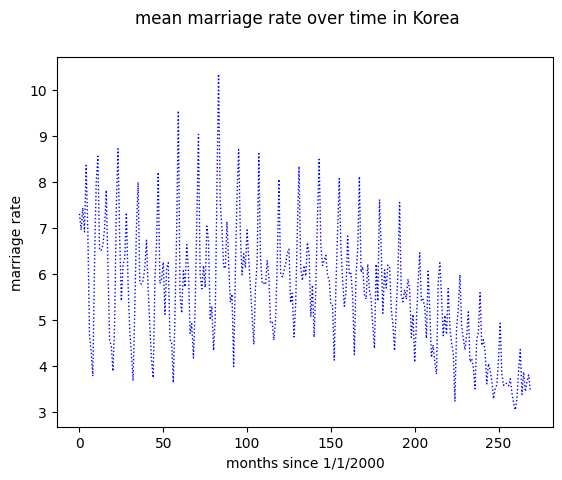

In [93]:
# linestyle ':' dotted, '--' dashed, '-.' mixed, '-' solid
date = range(mean_marriage_by_date.size)
plt.plot(date, mean_marriage_by_date,
        color='b', linewidth=1,linestyle=':')
plt.xlabel('months since 1/1/2000')
plt.ylabel('marriage rate')
plt.suptitle('mean marriage rate over time in Korea');

## We can also create two separate lines and in different colors to make it pretty! YAY

![h](https://media.makeameme.org/created/today-lets-make.jpg)

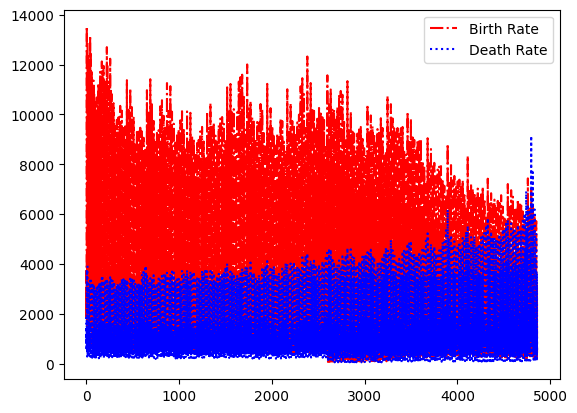

In [94]:
plt.plot(df_korea_new['Birth'],  color='r',label='Birth Rate',linestyle='-.')
plt.plot(df_korea_new['Death'], color='b',label='Death Rate',linestyle=':')
plt.legend()
# plt.xlabel('months since 1/1/2000')
# plt.ylabel('Rate')
# plt.suptitle('mean marriage rate over time in Korea');

## We can also create two separate lines and in different colors to make it pretty! Lets do it for Divorce rate and Marriage rate:

Tell me what i need for it

## `plt.fill_between()`

Shades between two line plots.  Great for showing how the data is distributed around its mean

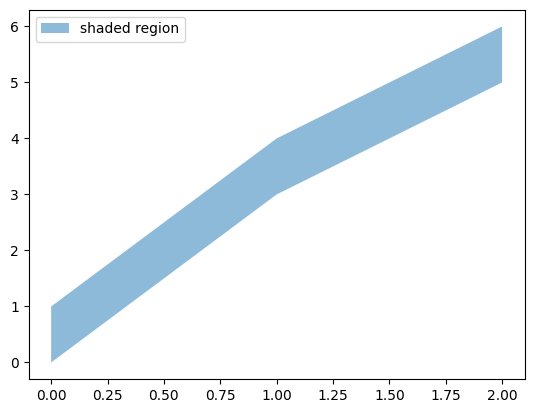

In [96]:
# simple fill between example
x = [0, 1, 2]
top = [1, 4, 6]
btm = [0, 3, 5]
plt.fill_between(x, top, btm, alpha=.5, label='shaded region')
plt.legend()

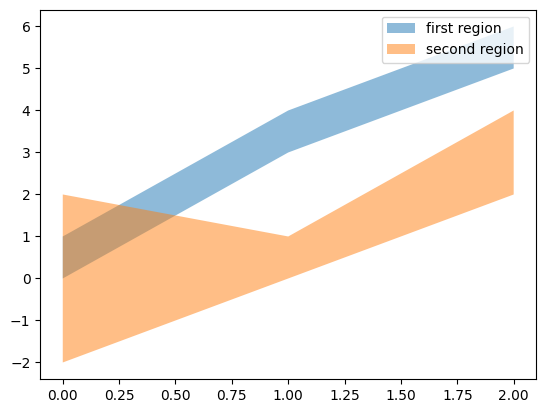

In [37]:
# slightly more complex example
x = [0, 1, 2]
regions = pd.Series({'top1': [1, 4, 6],
                    'top2': [2, 1, 4],
                    'btm1': [0, 3, 5],
                    'btm2': [-2, 0, 2]})
labels = ['first region', 'second region']

for area in range(2):
    plt.fill_between(x, regions[area], regions[area+2], alpha = .5, label = labels[area])

plt.legend()

## Tip: Shop around for just the right graph

Seaborn has some more niche graphs which are fantastic for specific applications.  While we won't cover the syntax on each of these, you'll find they're similar to what we've already covered.

Take a few minutes outside of class to browse these graphs to see whats out there:

[https://seaborn.pydata.org/examples/index.html](https://seaborn.pydata.org/examples/index.html)

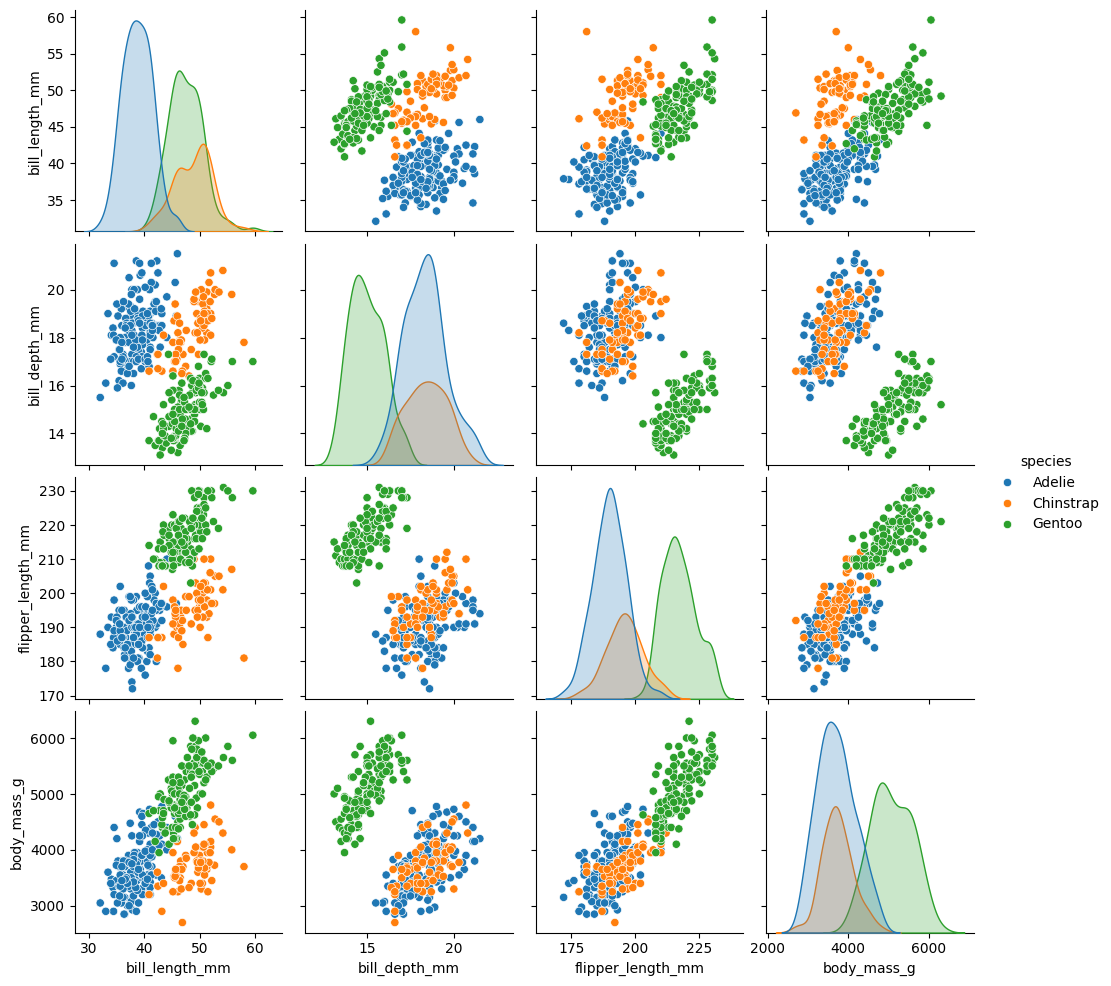

In [43]:
df_penguin = sns.load_dataset('penguins')

sns.pairplot(df_penguin, hue='species')

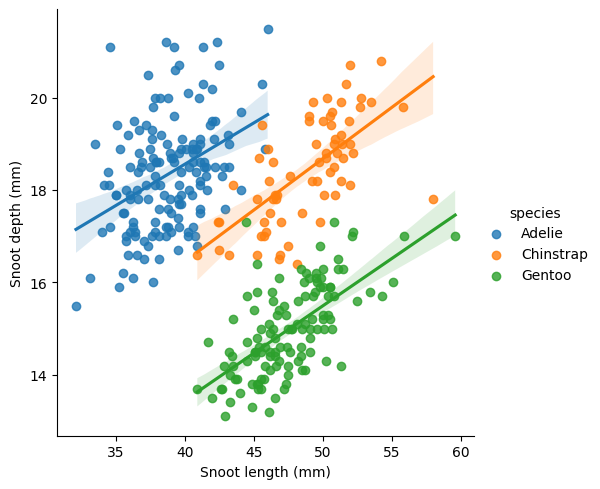

In [44]:
# Plot bill depth as a function of bill length by species
g = sns.lmplot(
    data=df_penguin,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

# Plotly
* Interactive visualization library
* https://plot.ly/python/ (https://plot.ly/python/getting-started/)
* Plotly is a big library, plotly express is a simplified interface
* Plotly uses different syntax as matplotlib / seaborn :(!

![he](https://media.makeameme.org/created/plotly-so-hot.jpg)

### Plotly scatter plots
- `hover_data`
- `color`
- `symbol`
- `size`

In [49]:
# use the df_korea_new which removed Whole country
# discard rows which are missing any feature
df_korea_nomiss = df_korea_new.dropna(axis=0, how='any')
df_korea_nomiss.shape

(4439, 13)

In [97]:
df_korea_nomiss.head()

,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate,Date1
0,1/1/2000,Busan,3752.0,11.61,1875.0,5.8,814.0,2.5,2435.0,7.5,1877.0,5.8,2000-01-01
1,1/1/2000,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7,2000-01-01
2,1/1/2000,Chungcheongnam-do,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7,2000-01-01
3,1/1/2000,Daegu,3057.0,14.39,1117.0,5.3,422.0,2.0,1577.0,7.4,1940.0,9.1,2000-01-01
4,1/1/2000,Daejeon,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2,2000-01-01


In [98]:
import plotly.express as px
fig=px.scatter(df_korea_nomiss, x='Marriage_rate', y='Natural_growth_rate', hover_data=['Date', 'Region'], size='Divorce_rate')
fig.show('iframe')

## Day-1 Dataset

Download it from Canvas if you haven't already.

In [99]:
gtky = pd.read_csv('day-1dataset.csv')
# only drop rows with missing values from one (or a list of several) columns
gtky_nomiss = gtky.dropna(axis=0, how='any')
gtky_nomiss.shape

(284, 38)

In [100]:
fig = px.scatter(data_frame=gtky_nomiss, x='Edu', y='Wealth', color='Reviews', hover_data=['Reviews'], size='Amenity_Count')
fig.show('iframe')

In [101]:
fig=px.scatter(data_frame=gtky_nomiss, x = 'White', y = 'Black', color = 'Reviews')
fig.show('iframe')

## Saving a Plotly Figure
* html is a great format to share your *interactive* plot

In [102]:
import plotly

plotly.offline.plot(fig, filename='class_data.html');

## Plotly does line plots too

- color

In [103]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame({'x':  [1, 2, 3, 4, 5, 6],
                   'y':  [2, 3, 4, 7, 10, 24],
                  'grp': [0, 1, 0, 1, 0, 1]})
df

,x,y,grp
0,1,2,0
1,2,3,1
2,3,4,0
3,4,7,1
4,5,10,0
5,6,24,1


In [104]:
fig=px.line(data_frame=df, x='x', y='y')
fig.show('iframe')

In [105]:
fig=px.line(data_frame=df, x='x', y='y', color='grp')
fig.show('iframe')